In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import yfinance as yf

In [4]:
df = yf.download('SUZLON.NS',start='2000-01-01',end='2023-09-16')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-10-19,127.800003,139.740005,116.050003,138.570007,136.711136,152125030
2005-10-20,140.199997,141.550003,127.400002,129.380005,127.644424,39078530
2005-10-21,127.050003,139.000000,127.050003,134.770004,132.962097,25623135
2005-10-24,137.399994,138.000000,129.660004,130.789993,129.035477,11125060
2005-10-25,128.259995,132.729996,128.259995,131.839996,130.071396,6320275
...,...,...,...,...,...,...
2023-09-11,24.299999,24.400000,23.750000,24.000000,24.000000,93344063
2023-09-12,24.150000,24.200001,22.799999,22.799999,22.799999,146034046
2023-09-13,22.200001,22.500000,21.700001,22.150000,22.150000,236321372


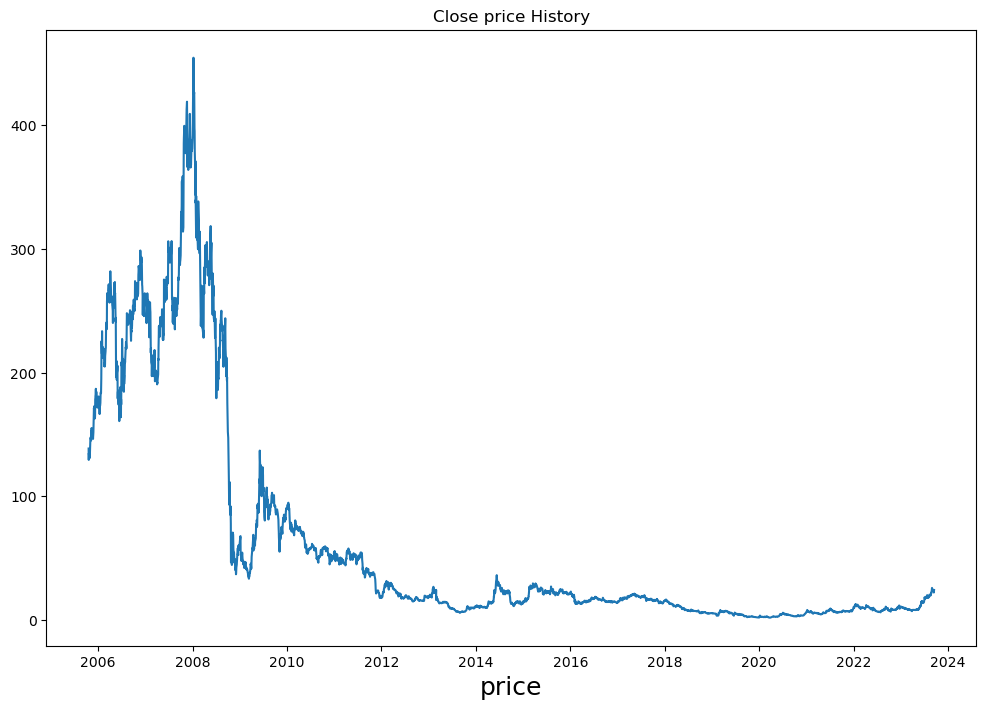

In [5]:
plt.figure(figsize=(12,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('price',fontsize=18)
plt.show()

In [20]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.1)
x=df.iloc[:-training_data_len]
print(x)
training_data_len = math.ceil(len(dataset)*0.9)
dataset.shape

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-10-19  127.800003  139.740005  116.050003  138.570007  136.711136   
2005-10-20  140.199997  141.550003  127.400002  129.380005  127.644424   
2005-10-21  127.050003  139.000000  127.050003  134.770004  132.962097   
2005-10-24  137.399994  138.000000  129.660004  130.789993  129.035477   
2005-10-25  128.259995  132.729996  128.259995  131.839996  130.071396   
...                ...         ...         ...         ...         ...   
2021-12-01    7.000000    7.150000    6.900000    7.150000    7.150000   
2021-12-02    7.400000    7.400000    7.000000    7.050000    7.050000   
2021-12-03    7.050000    7.100000    6.950000    7.000000    7.000000   
2021-12-06    7.000000    7.200000    6.950000    7.000000    7.000000   
2021-12-07    7.050000    7.150000    7.000000    7.000000    7.000000   

               Volume  
Date         

(4419, 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.3021243 ],
       [0.28183105],
       [0.29373318],
       ...,
       [0.04504704],
       [0.04747604],
       [0.04957382]])

In [8]:
train_data  = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i,0])
    y_train.append(train_data[i,0])
    if i <= 40:
        print(x_train)
        print(y_train)
        print()

[array([0.3021243 , 0.28183105, 0.29373318, 0.28494457, 0.28726317,
       0.29993818, 0.29461644, 0.28569538, 0.3117299 , 0.32166675,
       0.32166675, 0.31647752, 0.33339222, 0.32584022, 0.33266351,
       0.33871396, 0.32837966, 0.32800424, 0.33345846, 0.32996952,
       0.32475823, 0.319304  , 0.32314623, 0.32433867, 0.33138279,
       0.35885263, 0.37437618, 0.37210175, 0.37757808, 0.36607341,
       0.36940776, 0.35898514, 0.35589366, 0.36132582, 0.3893698 ,
       0.39661265, 0.39917416, 0.40880186, 0.39480192, 0.40396592])]
[0.40242019915203636]



In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3938, 40, 1)

In [11]:
model = Sequential()
model.add((LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1))))
model.add((LSTM(50,return_sequences=False,input_shape = (x_train.shape[1],1))))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
model.compile(optimizer='adam',loss='mse')


In [13]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
124/124 [==============================] - 13s 40ms/step - loss: 0.0030
Epoch 2/50
124/124 [==============================] - 5s 38ms/step - loss: 5.3746e-04
Epoch 3/50
124/124 [==============================] - 5s 38ms/step - loss: 4.4159e-04
Epoch 4/50
124/124 [==============================] - 5s 39ms/step - loss: 4.2149e-04
Epoch 5/50
124/124 [==============================] - 5s 39ms/step - loss: 4.6875e-04
Epoch 6/50
124/124 [==============================] - 5s 41ms/step - loss: 3.0082e-04
Epoch 7/50
124/124 [==============================] - 5s 39ms/step - loss: 3.2341e-04
Epoch 8/50
124/124 [==============================] - 5s 41ms/step - loss: 2.8957e-04
Epoch 9/50
124/124 [==============================] - 5s 41ms/step - loss: 2.4738e-04
Epoch 10/50
124/124 [==============================] - 5s 41ms/step - loss: 2.7457e-04
Epoch 11/50
124/124 [==============================] - 5s 40ms/step - loss: 2.4821e-04
Epoch 12/50
124/124 [==============================] - 

In [23]:
test_data = scaled_data[training_data_len -40: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(40,len(test_data)):
    x_test.append(test_data[i-40:i,0])


In [24]:
x_test = np.array(x_test)
x_test =  np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(441, 40, 1)


In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 2s 15ms/step


In [17]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.1210727981055792

(441, 1)


/tmp/ipykernel_9759/856311049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


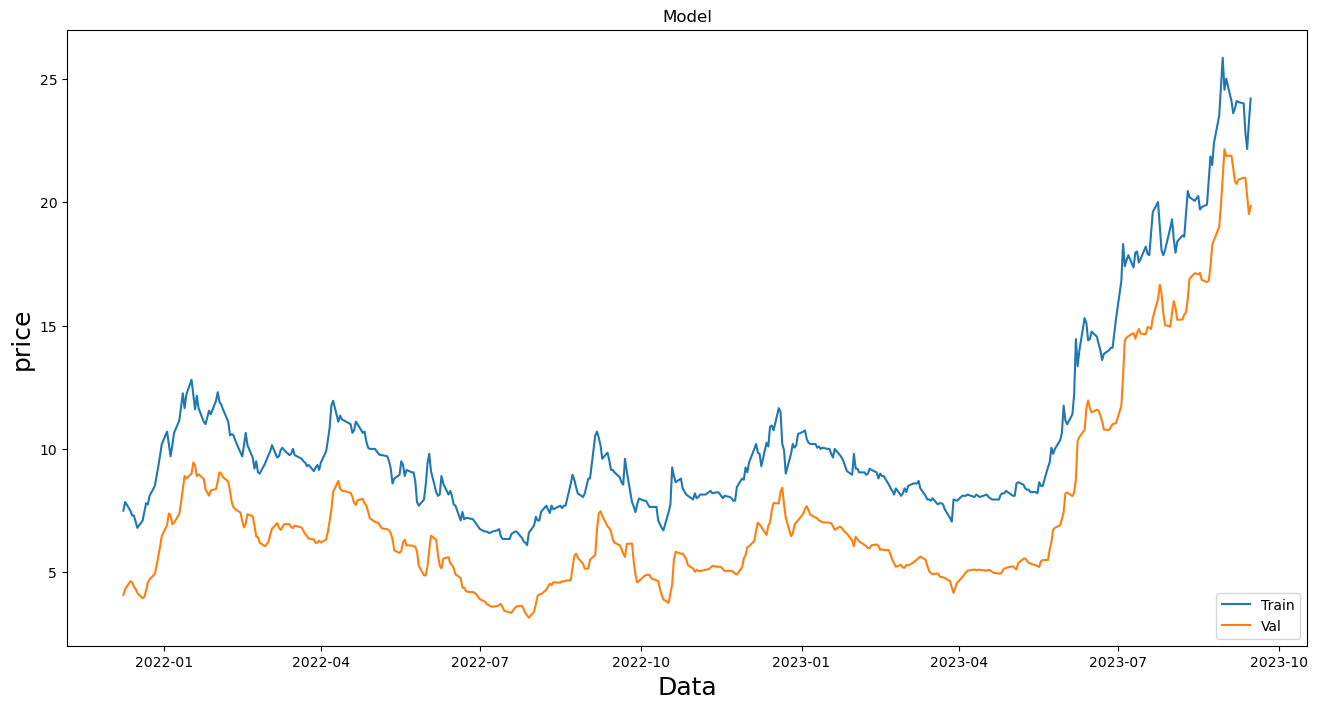

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
print(valid.shape)
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('price',fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()